In [1]:
library("data.table")
library("qtl")

In [91]:

#datf2.5.old <- datf2.5
load("202000910_nodens.Rdata")
#load('20201109_nodens.Rdata')

In [ ]:
#genmap <- est.map(datf2.5, error.prob=0.005)
#datf2.5 <- replace.map(datf2.5, genmap)
#datf2.5 <- calc.genoprob(datf2.5, step=1)
#datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)
#save.image(file = "20201109_nodens.Rdata")

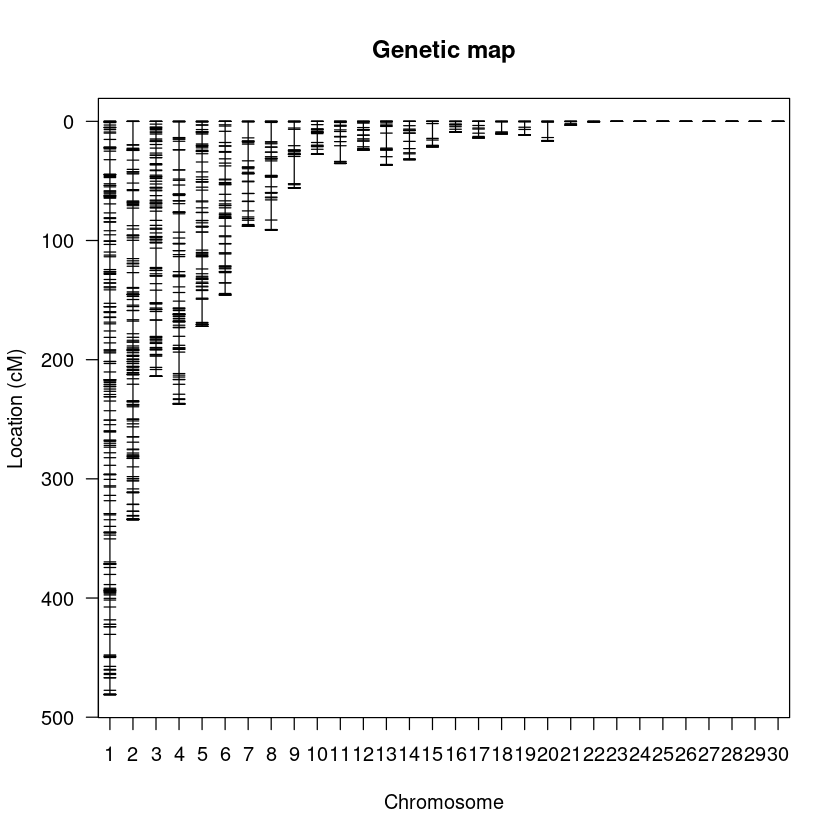

In [90]:
plotMap(datf2.5)

# subset the data

In [3]:
chr4 = subset(datf2.5, chr = 4)

In [4]:
ac <- pull.pheno(chr4, c("SEX", "GENERATION"))


## make permutations:

In [ ]:
out.acovar.chr4.perm <- scanone(chr4, pheno.col = 3, addcovar=ac, n.perm = 10000)

In [ ]:
summary(out.acovar.chr4.perm)

# find all peaks that are suggestive

In [6]:
ac <- pull.pheno(datf2.5, c("SEX", "GENERATION"))
out.acovar.all <- scanone(datf2.5, pheno.col = 3, addcovar=ac)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”


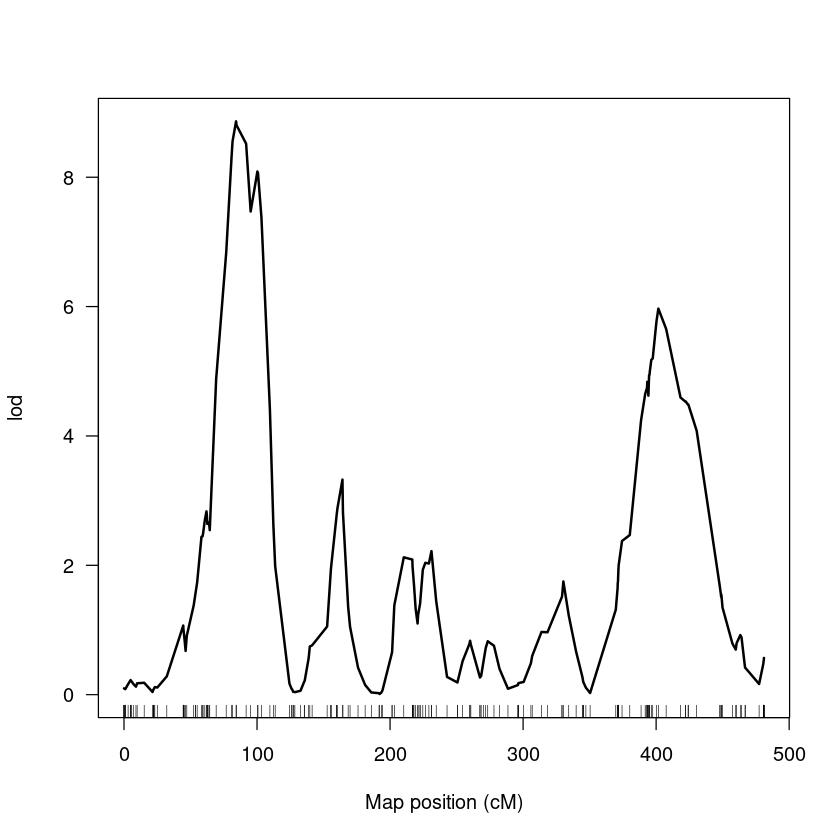

In [8]:
plot(out.acovar.all, chr=1)
#xlim = c(200,500))

In [ ]:
#max(out.acovar.all[out.acovar.all$chr==1 & out.acovar.all$pos > 0  ,])


In [ ]:
#max(out.acovar.all[out.acovar.all$chr==30 & out.acovar.all$pos > 0 &  out.acovar.all$pos < 100,])


below are all peaks that are suggestive - i.e. significant at chrom 4 significance levels 5% after 10k permutations

In [ ]:
1-50	1	84.23679	8.864121
1-79	1	164.2182	3.324873
1-170	1	401.677	5.968426
2-98	2	216.027	2.714424
2-138	2	327.171	3.21146
3-77	3	141.6651	2.690947
4-15	4	49.49908	8.079024
6-4	6	0.02957916	2.799598
6-29	6	78.12438	4.528085
7-22	7	50.22548	14.21153
8-9	8	21.68429	3.058372
8-36	8	91.15566	3.121123
9-4	9	0.6851328	3.753586
10-16	10	20.48725	3.623719
12-9	12	7.497863	2.789307
13-8	13	4.298689	5.246326
14-12	14	22.88642	2.995042
16-10	16	8.951825	3.35403
21-9	21	3.066803	2.823419
23-1	23	1e-07	2.740163
27-7	27	7e-07	3.380714
29-6	29	6e-07	2.84695

In [30]:
chrom  <- c(1,1,1,2,2,3,4,6,6,7,8,8,9,10,12,13,14,16,21,23,27,29,29)

pos <- c(84.23679,164.2182,401.677,216.027,327.171,141.6651,49.49908,0.02957916,78.12438,50.22548,21.68429,91.15566,0.6851328,20.48725,7.497863,4.298689,22.88642,8.951825,3.066803,1.00E-07,7.00E-07,6.00E-07,5.00E-07)

In [10]:
chrom  <- c(1,1,1,2,2,3,4,6,6,7,8,8,9,10,12,13,14,16,21,23,27,29)

pos <- c(84.23679,164.2182,401.677,216.027,327.171,141.6651,49.49908,0.02957916,78.12438,50.22548,21.68429,91.15566,0.6851328,20.48725,7.497863,4.298689,22.88642,8.951825,3.066803,1.00E-07,7.00E-07,6.00E-07)

# Fit QTLS INDIVIDUALLY

In [64]:
for (qtl in seq(1,23)){
    curr_chrom = chrom[qtl]
    curr_pos = pos[qtl]
    qtls <- makeqtl(datf2.5, chr = curr_chrom, pos = curr_pos, what = 'prob')
    fit_sugg <- fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests=TRUE)
    print(summary(fit_sugg))
}

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS        MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17996928 4499232.0 121.6835 16.66935            0         0
Error 3068  89967259   29324.4                                         
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD   %var F value Pvalue(Chi2) Pvalue(F)    
1@84.2      2     1221935   9.002  1.132   20.83            0  1.03e-09 ***
SEX         1    14994825 102.866 13.889  511.34            0   < 2e-16 ***
GENERATION  1     1841926  13.524  1.706   62.81            0  3.11e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
               est  

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17235963 4308990.79 116.0631 15.96452            0         0
Error 3068  90728224   29572.43                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD   %var F value Pvalue(Chi2) Pvalue(F)    
1@164.2     2      460970   3.382  0.427   7.794            0   0.00042 ***
SEX         1    15003758 102.122 13.897 507.356            0   < 2e-16 ***
GENERATION  1     1756096  12.792  1.627  59.383            0  1.73e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS     LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17598801 4399700.23 118.737 16.30059            0         0
Error 3068  90365386   29454.17                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD   %var F value Pvalue(Chi2) Pvalue(F)    
1@401.7     2      823808   6.056  0.763   13.98            0  9.00e-07 ***
SEX         1    14708729 100.631 13.624  499.38            0   < 2e-16 ***
GENERATION  1     1895897  13.855  1.756   64.37            0  1.44e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                est 

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17150234 4287558.39 115.4328 15.88511            0         0
Error 3068  90813953   29600.38                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
2@216.0     2      375240   2.752  0.3476   6.338        0.002   0.00179 ** 
SEX         1    14899426 101.374 13.8003 503.353        0.000   < 2e-16 ***
GENERATION  1     1918671  13.951  1.7771  64.819        0.000  1.11e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS     LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17216367 4304091.75 115.919 15.94637            0         0
Error 3068  90747820   29578.82                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
2@327.2     2      441374   3.238  0.4088   7.461        0.001  0.000586 ***
SEX         1    14771789 100.636 13.6821 499.404        0.000   < 2e-16 ***
GENERATION  1     1770064  12.890  1.6395  59.842        0.000  1.38e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17149448 4287362.03 115.4271 15.88439            0         0
Error 3068  90814739   29600.63                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
3@141.7     2      374455   2.746  0.3468   6.325        0.002   0.00181 ** 
SEX         1    14779923 100.619 13.6897 499.311        0.000   < 2e-16 ***
GENERATION  1     1585104  11.547  1.4682  53.550        0.000   3.2e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17890602 4472650.39 120.8953 16.57087            0         0
Error 3068  90073585   29359.06                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD   %var F value Pvalue(Chi2) Pvalue(F)    
4@49.5      2     1115608   8.214  1.033   19.00            0  6.30e-09 ***
SEX         1    14937588 102.389 13.836  508.79            0   < 2e-16 ***
GENERATION  1     1470371  10.805  1.362   50.08            0  1.82e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS     LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17166999 4291749.69 115.556 15.90064            0         0
Error 3068  90797188   29594.91                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
6@0.0       2      392006   2.875  0.3631   6.623        0.001   0.00135 ** 
SEX         1    14698617 100.123 13.6143 496.660        0.000   < 2e-16 ***
GENERATION  1     1830384  13.318  1.6954  61.848        0.000  5.11e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS     LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17398419 4349604.84 117.259 16.11499            0         0
Error 3068  90565767   29519.48                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
6@78.1      2      623426   4.578  0.5774   10.56            0  2.69e-05 ***
SEX         1    14895611 101.608 13.7968  504.60            0   < 2e-16 ***
GENERATION  1     1710677  12.487  1.5845   57.95            0  3.55e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  18726532 4681632.92 127.1171 17.34513            0         0
Error 3068  89237655   29086.59                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS    LOD   %var F value Pvalue(Chi2) Pvalue(F)    
7@50.2      2     1951539  14.44  1.808   33.55            0  3.89e-15 ***
SEX         1    14873313 102.87 13.776  511.35            0   < 2e-16 ***
GENERATION  1     1715484  12.71  1.589   58.98            0  2.13e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                est 

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17200570 4300142.60 115.8028 15.93174            0         0
Error 3068  90763616   29583.97                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
8@21.7      2      425577   3.122  0.3942   7.193        0.001  0.000765 ***
SEX         1    14890590 101.371 13.7922 503.333        0.000   < 2e-16 ***
GENERATION  1     1764096  12.845  1.6340  59.630        0.000  1.53e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17211620 4302905.06 115.8841 15.94197            0         0
Error 3068  90752566   29580.37                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
8@91.2      2      436627   3.203  0.4044    7.38        0.001  0.000635 ***
SEX         1    14941879 101.706 13.8397  505.13        0.000   < 2e-16 ***
GENERATION  1     2167522  15.750  2.0076   73.28        0.000   < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17293373 4323343.36 116.4855 16.01769            0         0
Error 3068  90670813   29553.72                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
9@0.7       2      518380   3.804  0.4801    8.77            0  0.000159 ***
SEX         1    14903622 101.549 13.8042  504.29            0   < 2e-16 ***
GENERATION  1     1619939  11.817  1.5004   54.81            0   1.7e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17280653 4320163.30 116.3918 16.00591            0         0
Error 3068  90683533   29557.87                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
10@20.5     2      505660   3.711  0.4684   8.554            0  0.000197 ***
SEX         1    14857892 101.247 13.7619 502.671            0   < 2e-16 ***
GENERATION  1     1985562  14.453  1.8391  67.175            0  3.33e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17167216 4291804.05 115.5576 15.90084            0         0
Error 3068  90796971   29594.84                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
12@7.5      2      392223   2.876  0.3633   6.627        0.001   0.00134 ** 
SEX         1    14904823 101.426 13.8053 503.629        0.000   < 2e-16 ***
GENERATION  1     1676014  12.205  1.5524  56.632        0.000  6.86e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD    %var Pvalue(Chi2) Pvalue(F)
Model    4  17504775 4376193.77 118.0431 16.2135            0         0
Error 3068  90459412   29484.81                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
13@4.3      2      729782   5.362  0.6759   12.38            0  4.44e-06 ***
SEX         1    14905536 101.781 13.8060  505.53            0   < 2e-16 ***
GENERATION  1     2001803  14.606  1.8541   67.89            0  2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17188884 4297221.06 115.7169 15.92091            0         0
Error 3068  90775302   29587.78                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
14@22.9     2      413891   3.036  0.3834   6.994        0.001  0.000932 ***
SEX         1    14826517 100.954 13.7328 501.103        0.000   < 2e-16 ***
GENERATION  1     1863859  13.563  1.7264  62.994        0.000  2.89e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17243812 4310953.10 116.1208 15.97179            0         0
Error 3068  90720374   29569.87                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS    LOD    %var F value Pvalue(Chi2) Pvalue(F)    
16@9.0      2      468819   3.44  0.4342   7.927            0  0.000368 ***
SEX         1    14912791 101.56 13.8127 504.324            0   < 2e-16 ***
GENERATION  1     2020315  14.70  1.8713  68.323            0  2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS     LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17168488 4292122.00 115.567 15.90202            0         0
Error 3068  90795699   29594.43                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
21@3.1      2      393495   2.886  0.3645   6.648        0.001   0.00132 ** 
SEX         1    14834435 100.983 13.7401 501.258        0.000   < 2e-16 ***
GENERATION  1     1975948  14.366  1.8302  66.768        0.000  4.44e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17167528 4291881.91 115.5599 15.90113            0         0
Error 3068  90796659   29594.74                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
23@0.0      2      392535   2.879  0.3636   6.632        0.001   0.00134 ** 
SEX         1    14933965 101.610 13.8323 504.616        0.000   < 2e-16 ***
GENERATION  1     1214858   8.869  1.1252  41.050        0.000  1.71e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17244754 4311188.41 116.1277 15.97266            0         0
Error 3068  90719433   29569.57                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
27@0.0      2      469760   3.446  0.4351   7.943            0  0.000362 ***
SEX         1    14752829 100.545 13.6646 498.919            0   < 2e-16 ***
GENERATION  1     1560299  11.379  1.4452  52.767            0  4.74e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
            

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD    %var Pvalue(Chi2) Pvalue(F)
Model    4  17180778 4295194.56 115.6573 15.9134            0         0
Error 3068  90783408   29590.42                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
29@0.0      2      405785   2.976  0.3759   6.857        0.001   0.00107 ** 
SEX         1    14918423 101.526 13.8179 504.164        0.000   < 2e-16 ***
GENERATION  1     1771198  12.894  1.6405  59.857        0.000  1.38e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD    %var Pvalue(Chi2) Pvalue(F)
Model    4  17180778 4295194.56 115.6573 15.9134            0         0
Error 3068  90783408   29590.42                                        
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)    
29@0.0      2      405785   2.976  0.3759   6.857        0.001   0.00107 ** 
SEX         1    14918423 101.526 13.8179 504.164        0.000   < 2e-16 ***
GENERATION  1     1771198  12.894  1.6405  59.857        0.000  1.38e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

In [70]:
#fit_sugg$ests$ests[4]
#summary(fit_sugg)
#fit_sugg


In [26]:
qtls <- makeqtl(datf2.5, chr = chrom, pos = pos, what = 'prob')

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [27]:
fit_sugg <- fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests=TRUE)

Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [25]:
chrom  <- c(1)
pos <- c(84.23679)

chrom  <- c(1)
pos <- c(164.2182)


In [28]:
summary(fit_sugg)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + SEX + GENERATION 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    4  17235963 4308990.79 116.0631 15.96452            0         0
Error 3068  90728224   29572.43                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS     LOD   %var F value Pvalue(Chi2) Pvalue(F)    
1@164.2     2      460970   3.382  0.427   7.794            0   0.00042 ***
SEX         1    15003758 102.122 13.897 507.356            0   < 2e-16 ***
GENERATION  1     1756096  12.792  1.627  59.383            0  1.73e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
                

In [17]:
summary(fit_sugg)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 
                    + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 + Q20 + Q21 + Q22 
                    + SEX + GENERATION 

        df        SS        MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   46  27013795 587256.42 192.1559 25.02107            0         0
Error 3026  80950391  26751.62                                         
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS      LOD     %var F value Pvalue(Chi2) Pvalue(F)    
1@84.2      2      610967   5.0174  0.56590  11.419        0.000  1.15e-05 ***
1@164.2     2      290293   2.3887  0.26888   5.426        0.004  0.004445 ** 
1@401.7     2      516508   4.244

In [ ]:
write.csv(fit_sugg$result.drop, '20201110_suggestive_anova_drop_one.csv')

In [79]:
out.cim <- cim(datf2.5, pheno.col = 3, map.function = 'kosambi')

In [100]:
#out.cim.perm <- cim(datf2.5, pheno.col = 3, map.function = 'kosambi', n.perm = 1000)

In [93]:
out.em.all = scanone(datf2.5, pheno.col = 3, addcovar = ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”


In [101]:
out.hk.all = scanone(datf2.5, pheno.col = 3, addcovar = ac2, method = 'hk')

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”


In [120]:
out.hk.all.perm = scanone(datf2.5, pheno.col = 3, addcovar = ac2, method = 'hk', n.perm = 10000)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”


Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [122]:
summary(out.hk.all.perm)

LOD thresholds (10000 permutations)
     lod
5%  3.75
10% 3.40

In [123]:
out.hk.chr4.perm = scanone(datf2.5, pheno.col = 3, addcovar = ac2, method = 'hk', n.perm = 10000, chr = 4)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”


Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [124]:
summary(out.acovar.chr4.perm)

LOD thresholds (10000 permutations)
     lod
5%  2.69
10% 2.35

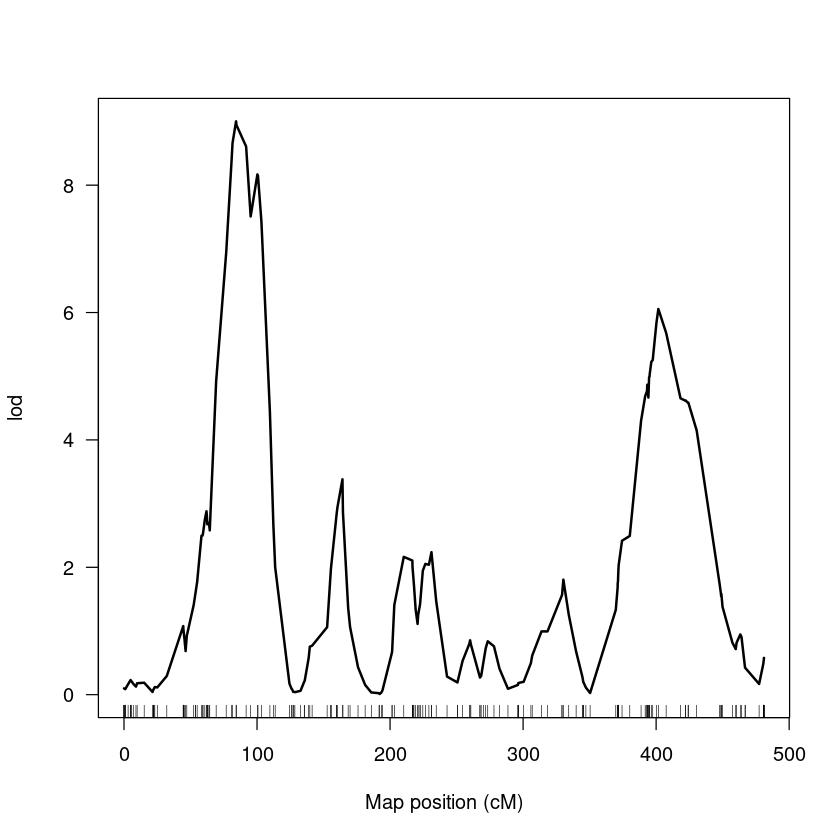

In [131]:
plot(out.hk.all, chr=1)


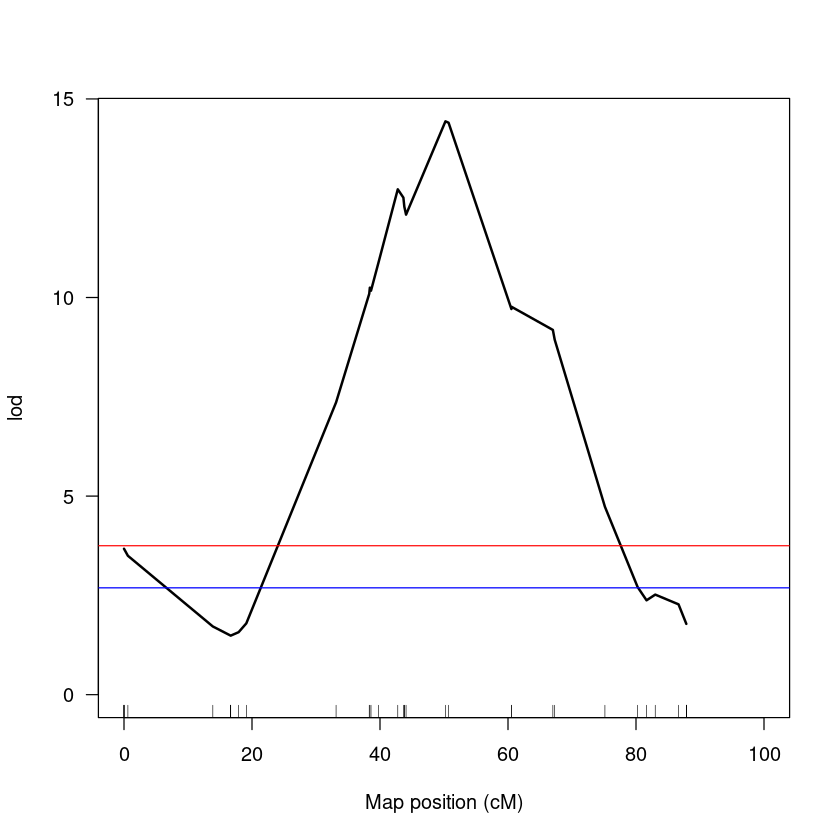

In [202]:
plot(out.hk.all, chr= 7, xlim = c(0,100))
abline(h=3.75, col='red')
abline(h=2.69, col='blue')

In [188]:
max(out.hk.all[out.hk.all$chr==12 & out.hk.all$pos > 0 &  out.hk.all$pos < 40,])


,chr,pos,lod
,<fct>,<dbl>,<dbl>
12-9,12,7.497863,2.876354


In [ ]:
1-50	1	84.23679	9.002179
1-79	1	164.2182	3.381787
1-170	1	401.677 6.055758

2-98	2	216.027	2.751555
2-138	2	327.171	3.237675

3-77	3	141.6651	2.745784

4-15	4	49.49908	8.214015

6-4	6	0.02957916	2.874756
6-29	6	78.12438	4.5777

7-1	7	1e-07	3.67385 # questionable
7-22	7	50.22548	14.43576

8-9	8	21.68429	3.121529 
8-36	8	91.15566	3.202772

9-4	9	0.6851328	3.804165

10-11	10	9.364181	2.86393 # questionable

10-16	10	20.48725	3.710557

12-9	12	7.497863	2.876354


In [ ]:
EM scores and pos

1-50	1	84.23679	8.864121
1-79	1	164.2182	3.324873
1-170	1	401.677	5.968426
2-98	2	216.027	2.714424
2-138	2	327.171	3.21146
3-77	3	141.6651	2.690947
4-15	4	49.49908	8.079024
6-4	6	0.02957916	2.799598
6-29	6	78.12438	4.528085
7-22	7	50.22548	14.21153
8-9	8	21.68429	3.058372
8-36	8	91.15566	3.121123
9-4	9	0.6851328	3.753586
10-16	10	20.48725	3.623719
12-9	12	7.497863	2.789307
13-8	13	4.298689	5.246326
14-12	14	22.88642	2.995042
16-10	16	8.951825	3.35403
21-9	21	3.066803	2.823419
23-1	23	1e-07	2.740163
27-7	27	7e-07	3.380714
29-6	29	6e-07	2.84695

In [ ]:
chrom5 <- c(1,1,4,6,7,13)
pos5 <- c(84.23679,401.677,49.49908,78.12438,50.22548,4.298689)

In [ ]:
qtls5 <- makeqtl(datf2.5, chr = chrom5, pos = pos5, what = 'prob')

In [ ]:
fit5 <- fitqtl(datf2.5, pheno.col = 3, qtl = qtls5, covar = ac2, get.ests = True)

In [ ]:
summary(fit5)

In [ ]:
chrom10 <- c(1,1,4,6,7,13,9,10)
pos10 <- c(84.23679,401.677,49.49908,78.12438,50.22548,4.298689,0.6851328,20.48725)
qtls10 <- makeqtl(datf2.5, chr = chrom10, pos = pos10, what = 'prob')
fit10 <- fitqtl(datf2.5, pheno.col = 3, qtl = qtls10, covar = ac2)

In [ ]:
summary(fit10)

In [ ]:
save.image(file = "20201110_nodens.Rdata")

# remove F8's to look at effect sizes

In [ ]:
F2 = datf2.5$pheno['GENERATION'] ==2
F3 = datf2.5$pheno['GENERATION'] ==3
F4 = datf2.5$pheno['GENERATION'] ==4
F5 = datf2.5$pheno['GENERATION'] ==5
F6 = datf2.5$pheno['GENERATION'] ==6
F7 = datf2.5$pheno['GENERATION'] ==7
F8 = datf2.5$pheno['GENERATION'] ==8
F9 = datf2.5$pheno['GENERATION'] ==9
F10 = datf2.5$pheno['GENERATION'] ==10
F11 = datf2.5$pheno['GENERATION'] ==11
F13 = datf2.5$pheno['GENERATION'] ==13
F14 = datf2.5$pheno['GENERATION'] ==14
F15 = datf2.5$pheno['GENERATION'] ==15

In [ ]:
all_but_f8 = as.logical(F2+F3+F4+F5+F6+F7+F9+F10+F11+F13+F14+F15)

In [ ]:
all_butf8_subs = subset(datf2.5, ind = all_but_f8)
acnoF8 <- pull.pheno(all_butf8_subs, c("SEX", 'GENERATION'))
out.acovar.noF8 <- scanone(all_butf8_subs, pheno.col = 3, addcovar=acnoF8)


In [ ]:
qtls_noF8 <- makeqtl(all_butf8_subs, chr = chrom, pos = pos, what = 'prob')

In [ ]:
fit_sugg_noF8 <- fitqtl(all_butf8_subs, pheno.col = 3, qtl = qtls_noF8, covar = acnoF8, get.ests=TRUE)

In [ ]:
summary(fit_sugg_noF8)

In [ ]:
write.csv(fit_sugg_noF8$ests$ests, '20201111_fit_sugg_nof8_ests.csv')

In [ ]:
write.csv(fit_sugg$ests$ests, '20201111_fit_sugg_ests.csv')

In [204]:
write.cross(datf2.5, '20201123_cross',format = 'csv')